<a href="https://colab.research.google.com/github/Luckygyana/CYCLE_GAN/blob/master/Cycle_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import  input_data
import numpy as np
import scipy.ndimage.interpolation

In [0]:
leaarning_rate=0.0002
batch_size=32
epochs=10

In [0]:
image_dimension=784

In [0]:

H_dim=128

In [0]:
def xavier_init(shape):
  return tf.random_normal(shape=shape,stddev=1./tf.sqrt(shape[0]/2.0))

In [0]:
X_A=tf.placeholder(tf.float32,shape=[None,image_dimension])
X_B=tf.placeholder(tf.float32,shape=[None,image_dimension])

In [0]:
Disc_A_w={"disc_H" : tf.Variable(xavier_init([image_dimension,H_dim])),
          "disc_final" : tf.Variable(xavier_init([H_dim,1]))}

Disc_A_Bias={"disc_H" : tf.Variable(xavier_init([H_dim])),
          "disc_final" : tf.Variable(xavier_init([1]))}

Disc_B_w={"disc_H" : tf.Variable(xavier_init([image_dimension,H_dim])),
          "disc_final" : tf.Variable(xavier_init([H_dim,1]))}

Disc_B_Bias={"disc_H" : tf.Variable(xavier_init([H_dim])),
          "disc_final" : tf.Variable(xavier_init([1]))}


Gen_AB_w={"Gen_H" : tf.Variable(xavier_init([image_dimension,H_dim])),
          "Gen_final" : tf.Variable(xavier_init([H_dim,image_dimension]))}

Gen_AB_Bias={"Gen_H" : tf.Variable(xavier_init([H_dim])),
          "Gen_final" : tf.Variable(xavier_init([image_dimension]))}

Gen_BA_w={"Gen_H" : tf.Variable(xavier_init([image_dimension,H_dim])),
          "Gen_final" : tf.Variable(xavier_init([H_dim,image_dimension]))}

Gen_BA_Bias={"Gen_H" : tf.Variable(xavier_init([H_dim])),
          "Gen_final" : tf.Variable(xavier_init([image_dimension]))}

In [0]:
def Disc_A(x):
  D_hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,Disc_A_w["disc_H"]),Disc_A_Bias["disc_H"]))
  disc_output=tf.add(tf.matmul(D_hidden_layer,Disc_A_w["disc_final"]),Disc_A_Bias["disc_final"])
  disc_prob_output=tf.nn.sigmoid(disc_output)
  return disc_prob_output

def Disc_B(x):
  D_hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,Disc_B_w["disc_H"]),Disc_B_Bias["disc_H"]))
  disc_output=tf.add(tf.matmul(D_hidden_layer,Disc_B_w["disc_final"]),Disc_B_Bias["disc_final"])
  disc_prob_output=tf.nn.sigmoid(disc_output)
  return disc_prob_output

def Gen_AB(x):
  G_hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,Gen_AB_w["Gen_H"]),Gen_AB_Bias["Gen_H"]))
  gen_output=tf.add(tf.matmul(G_hidden_layer,Gen_AB_w["Gen_final"]),Gen_AB_Bias["Gen_final"])
  gen_prob_output=tf.nn.sigmoid(gen_output)
  return gen_prob_output

def Gen_BA(x):
  G_hidden_layer=tf.nn.relu(tf.add(tf.matmul(x,Gen_BA_w["Gen_H"]),Gen_BA_Bias["Gen_H"]))
  gen_output=tf.add(tf.matmul(G_hidden_layer,Gen_BA_w["Gen_final"]),Gen_BA_Bias["Gen_final"])
  gen_prob_output=tf.nn.sigmoid(gen_output)
  return gen_prob_output

In [0]:
X_BA=Gen_BA(X_B)
Disc_A_real=Disc_A(X_A)
Disc_A_fake=Disc_A(X_BA)

In [0]:
X_AB=Gen_AB(X_A)
Disc_B_real=Disc_B(X_B)
Disc_B_fake=Disc_B(X_AB)

In [0]:
Loss_Disc_A =(tf.reduce_mean(tf.square(Disc_A_real-tf.ones_like(Disc_A_real))+tf.reduce_mean(tf.square(Disc_A_fake))))/2.0
Loss_Disc_B =(tf.reduce_mean(tf.square(Disc_B_real-tf.ones_like(Disc_B_real))+tf.reduce_mean(tf.square(Disc_B_fake))))/2.0

Disc_Loss=Loss_Disc_A+Loss_Disc_B

In [0]:
X_BAB=Gen_AB(X_BA)
X_ABA=Gen_BA(X_AB)

In [0]:
Loss_Gen_A=tf.reduce_mean(tf.square(Disc_B_fake-tf.ones_like(Disc_B_fake)))
Loss_Gen_B=tf.reduce_mean(tf.square(Disc_A_fake-tf.ones_like(Disc_A_fake)))

Loss_total=Loss_Gen_A+Loss_Gen_B

In [0]:
Loss_Recon_B=tf.reduce_mean(10*tf.abs((X_B-X_BAB)))
Loss_Recon_A=tf.reduce_mean(10*tf.abs((X_A-X_ABA)))

Loss_recon_total=Loss_Recon_A+Loss_Recon_B

In [0]:
Gen_Loss=Loss_recon_total+Loss_total

In [0]:
Disc_param = [Disc_A_w["disc_H"],Disc_A_w["disc_final"],Disc_A_Bias["disc_H"],Disc_A_Bias["disc_final"],
             Disc_B_w["disc_H"],Disc_B_w["disc_final"],Disc_B_Bias["disc_H"],Disc_B_Bias["disc_final"] ]

In [0]:
Gen_param=[Gen_AB_w["Gen_H"],Gen_AB_w["Gen_final"],Gen_AB_Bias["Gen_H"],Gen_AB_Bias["Gen_final"],
          Gen_BA_w["Gen_H"],Gen_BA_w["Gen_final"],Gen_BA_Bias["Gen_H"],Gen_BA_Bias["Gen_final"] ]

In [0]:
Gen_optimize=tf.train.AdamOptimizer(learning_rate=leaarning_rate).minimize(Gen_Loss,var_list=Gen_param)
Disc_optimize=tf.train.AdamOptimizer(learning_rate=leaarning_rate).minimize(Disc_Loss,var_list=Disc_param)

In [20]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz


--2020-02-24 14:24:06--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.62
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  6.54MB/s    in 3.9s    

2020-02-24 14:24:11 (6.54 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-02-24 14:24:14--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.19
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [0]:
!mkdir Mnist_Fashion/
!cp *.gz Mnist_Fashion/

In [23]:
mnist=input_data.read_data_sets("Mnist_Fashion/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Mnist_Fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting Mnist_Fashion/train-labels-idx1-ubyte.gz
Extracting Mnist_Fashion/t10k-images-idx3-ubyte.gz
Extracting Mnist_Fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
X_train=mnist.train.images
mid=int(X_train.shape[0]/2)

In [0]:
X_train_real=X_train[:mid]
X_train_rot=X_train[mid:].reshape(-1,28,28)
X_train_r0t=scipy.ndimage.interpolation.rotate(X_train_rot,90,axes=(1,2))
X_train_rot=X_train_rot.reshape(-1,28*28)

In [0]:
def shuffle_data(x,size):
  start_index=np.random.randint(0,x.shape[0]-size)
  return x[start_index:start_index+size]

In [0]:
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

In [28]:
for epoch in range(epochs):
  X_A_batch=shuffle_data(X_train_real,batch_size)
  X_B_batch=shuffle_data(X_train_rot,batch_size)

  _,Disc_Loss_epoch=sess.run([Disc_optimize,Disc_Loss],feed_dict={X_A:X_A_batch,X_B:X_B_batch})
  _,Gen_Loss_epoch=sess.run([Gen_optimize,Gen_Loss],feed_dict={X_A:X_A_batch,X_B:X_B_batch})


  if epoch%200==0:
    print("Steps : {0} , Disc loss : {1} ,Gen loss : {2}".format(epoch,Disc_Loss_epoch,Gen_Loss_epoch))

Steps : 0 , Disc loss : 0.5452109575271606 ,Gen loss : 8.348894119262695


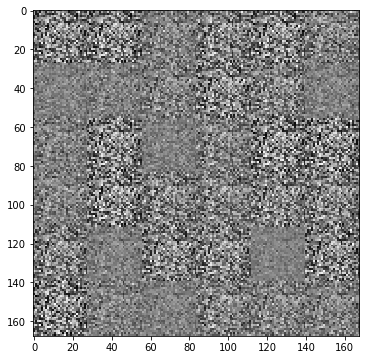

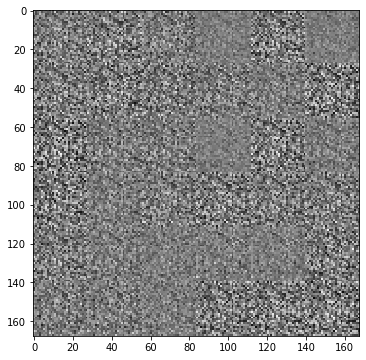

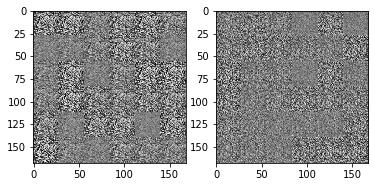

In [29]:
n=6
canvas1=np.empty((28*n,28*n))
canvas2=np.empty((28*n,28*n))

for i in range(n):
  test_A=shuffle_data(X_train_real,batch_size)
  test_B=shuffle_data(X_train_rot,batch_size)
  out_A=sess.run(X_BA,feed_dict={X_B:test_B})
  out_B=sess.run(X_AB,feed_dict={X_A:test_A})

  for j in range(n):
    canvas1[i*28:(i+1)*28,j*28:(j+1)*28]=out_A[j].reshape([28,28])
  for j in range(n):
    canvas2[i*28:(i+1)*28,j*28:(j+1)*28]=out_B[j].reshape([28,28])

plt.figure(figsize=(n,n))
plt.imshow(canvas1,origin="upper",cmap="gray")
plt.show()

plt.figure(figsize=(n,n))
plt.imshow(canvas2,origin="upper",cmap="gray")
plt.show()

f,ax=plt.subplots(1,2)
ax[0].imshow(canvas1,origin="upper",cmap="gray")
ax[1].imshow(canvas2,origin="upper",cmap="gray")
plt.show()